### OP1 - Analysis of Sales and Valuation Data 2024/25

#### System Setup

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
# importing dataset

df = pd.read_csv('all_sales_data_24_25.csv')
df = df.drop(0)
df = df.reset_index(drop = True)
df.head()


,SALE No.,DESPATCH DATE,GRADE,Unnamed: 3,Unnamed: 4,QTY,VALUE,QTY.1,Vlu P,Vlu pro,PROCEEDS,Asking P,Asking Pro,Def,Last bid
0,14.0,02.04.2024,NVK,2047,OP1,350,3600.0,350.0,3500.0,1225000.0,1260000,NaN,NaN,NaN,NaN
1,14.0,02.04.2024,NaN,2048,OP1,680,1950.0,680.0,2000.0,1360000.0,1326000,NaN,NaN,NaN,NaN
2,14.0,02.04.2024,NaN,2075,OP1,640,1800.0,640.0,1900.0,1216000.0,1152000,NaN,NaN,NaN,NaN
3,14.0,02.04.2024,NaN,2073,OP,640,1460.0,640.0,1500.0,960000.0,934400,NaN,NaN,NaN,NaN
4,14.0,02.04.2024,NaN,2066,OPA,520,1460.0,520.0,1450.0,754000.0,759200,NaN,NaN,NaN,NaN


In [3]:
df = df.drop(['GRADE','Unnamed: 3','Def','Last bid'],axis=1)
df = df.rename(columns = {
    'SALE No.' : 'Sale_No.',
    'Unnamed: 4' : 'Grade',
    'DESPATCH DATE' : 'Despatch_Date',
    'QTY' : 'Actual_Quantity',
    'VALUE' : 'Actual_Price',
    'QTY.1' : 'Valuation_Quantity',
    'Vlu P' : 'Valuation_Price',
    'Vlu pro' : 'Valuation_Proceeds',
    'PROCEEDS' : 'Actual_Proceeds',
    'Asking P' : 'Asking_Price',
    'Asking Pro' : 'Asking_Proceeds'
    })

In [4]:
df = df[df['Grade'] == 'OP1']
df.head()

,Sale_No.,Despatch_Date,Grade,Actual_Quantity,Actual_Price,Valuation_Quantity,Valuation_Price,Valuation_Proceeds,Actual_Proceeds,Asking_Price,Asking_Proceeds
0,14.0,02.04.2024,OP1,350,3600.0,350.0,3500.0,1225000.0,1260000,NaN,NaN
1,14.0,02.04.2024,OP1,680,1950.0,680.0,2000.0,1360000.0,1326000,NaN,NaN
2,14.0,02.04.2024,OP1,640,1800.0,640.0,1900.0,1216000.0,1152000,NaN,NaN
25,14.0,02.04.2024,OP1,1200,1800.0,1200.0,1650.0,1980000.0,2160000,NaN,NaN
26,14.0,02.04.2024,OP1,1200,1750.0,1200.0,1750.0,2100000.0,2100000,NaN,NaN


In [5]:
dfw = df.copy() # dfw refers to dataframe_working (dfw)
dfw.head()

,Sale_No.,Despatch_Date,Grade,Actual_Quantity,Actual_Price,Valuation_Quantity,Valuation_Price,Valuation_Proceeds,Actual_Proceeds,Asking_Price,Asking_Proceeds
0,14.0,02.04.2024,OP1,350,3600.0,350.0,3500.0,1225000.0,1260000,NaN,NaN
1,14.0,02.04.2024,OP1,680,1950.0,680.0,2000.0,1360000.0,1326000,NaN,NaN
2,14.0,02.04.2024,OP1,640,1800.0,640.0,1900.0,1216000.0,1152000,NaN,NaN
25,14.0,02.04.2024,OP1,1200,1800.0,1200.0,1650.0,1980000.0,2160000,NaN,NaN
26,14.0,02.04.2024,OP1,1200,1750.0,1200.0,1750.0,2100000.0,2100000,NaN,NaN


#### Data Exploration

In [6]:
dfw.shape

(362, 11)

In [7]:
dfw.columns

Index(['Sale_No.', 'Despatch_Date', 'Grade', 'Actual_Quantity', 'Actual_Price',
       'Valuation_Quantity', 'Valuation_Price', 'Valuation_Proceeds',
       'Actual_Proceeds', 'Asking_Price', 'Asking_Proceeds'],
      dtype='object')

In [8]:
dfw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 362 entries, 0 to 3348
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sale_No.            362 non-null    float64
 1   Despatch_Date       362 non-null    object 
 2   Grade               362 non-null    object 
 3   Actual_Quantity     360 non-null    object 
 4   Actual_Price        343 non-null    float64
 5   Valuation_Quantity  362 non-null    float64
 6   Valuation_Price     362 non-null    float64
 7   Valuation_Proceeds  362 non-null    float64
 8   Actual_Proceeds     362 non-null    object 
 9   Asking_Price        289 non-null    float64
 10  Asking_Proceeds     305 non-null    float64
dtypes: float64(7), object(4)
memory usage: 33.9+ KB


In [9]:
dfw.describe()

,Sale_No.,Actual_Price,Valuation_Quantity,Valuation_Price,Valuation_Proceeds,Asking_Price,Asking_Proceeds
count,362.000000,343.000000,362.000000,362.000000,3.620000e+02,289.000000,3.050000e+02
mean,24.933702,1727.507289,869.292818,1677.403315,1.304224e+06,1775.190311,1.278878e+06
std,12.601984,602.624362,372.781337,585.084716,4.168737e+05,620.388024,5.370709e+05
min,1.000000,810.000000,320.000000,750.000000,4.800000e+05,800.000000,0.000000e+00
25%,16.000000,1380.000000,640.000000,1350.000000,9.600000e+05,1400.000000,9.600000e+05
50%,24.000000,1500.000000,690.000000,1500.000000,1.260000e+06,1550.000000,1.320000e+06
75%,32.750000,1975.000000,1200.000000,1900.000000,1.662000e+06,2100.000000,1.680000e+06
max,51.000000,4050.000000,1320.000000,4000.000000,2.176000e+06,3650.000000,2.304000e+06


In [10]:
dfw.nunique()

Sale_No.               51
Despatch_Date          70
Grade                   1
Actual_Quantity        17
Actual_Price           74
Valuation_Quantity     17
Valuation_Price        75
Valuation_Proceeds    142
Actual_Proceeds       140
Asking_Price           45
Asking_Proceeds        90
dtype: int64

In [11]:
dfw['Grade'].unique()

array(['OP1'], dtype=object)

In [12]:
dfw['Grade'].value_counts()

Grade
OP1    362
Name: count, dtype: int64

#### Data Preprocessing

##### Data Cleansing

In [13]:
dfw.head()

,Sale_No.,Despatch_Date,Grade,Actual_Quantity,Actual_Price,Valuation_Quantity,Valuation_Price,Valuation_Proceeds,Actual_Proceeds,Asking_Price,Asking_Proceeds
0,14.0,02.04.2024,OP1,350,3600.0,350.0,3500.0,1225000.0,1260000,NaN,NaN
1,14.0,02.04.2024,OP1,680,1950.0,680.0,2000.0,1360000.0,1326000,NaN,NaN
2,14.0,02.04.2024,OP1,640,1800.0,640.0,1900.0,1216000.0,1152000,NaN,NaN
25,14.0,02.04.2024,OP1,1200,1800.0,1200.0,1650.0,1980000.0,2160000,NaN,NaN
26,14.0,02.04.2024,OP1,1200,1750.0,1200.0,1750.0,2100000.0,2100000,NaN,NaN


In [14]:
# handling missing values

dfw.isnull().sum()

Sale_No.               0
Despatch_Date          0
Grade                  0
Actual_Quantity        2
Actual_Price          19
Valuation_Quantity     0
Valuation_Price        0
Valuation_Proceeds     0
Actual_Proceeds        0
Asking_Price          73
Asking_Proceeds       57
dtype: int64

In [15]:
# comparing Actual quantity and Valuation Quantity

# extracting numerical values only from the Actual quantity column

dfw["Actual_Quantity_numeric_only"] = dfw["Actual_Quantity"].str.extract(r"(\d+\.?\d*)") # Extract only numbers (integers or decimals)
dfw["Actual_Quantity_numeric_only"] = pd.to_numeric(dfw["Actual_Quantity_numeric_only"]) # Convert to numeric

# comparison

diff_mask = dfw["Actual_Quantity_numeric_only"] != dfw["Valuation_Quantity"]
differences = dfw[diff_mask]

differences


,Sale_No.,Despatch_Date,Grade,Actual_Quantity,Actual_Price,Valuation_Quantity,Valuation_Price,Valuation_Proceeds,Actual_Proceeds,Asking_Price,Asking_Proceeds,Actual_Quantity_numeric_only
122,17.0,30.04.2024,OP1,NaN,NaN,640.0,1800.0,1152000.0,0,NaN,NaN,NaN
148,17.0,30.04.2024,OP1,NaN,NaN,1200.0,1600.0,1920000.0,0,NaN,NaN,NaN
547,25.0,25.06.2024,OP1,Unsold,NaN,1280.0,1000.0,1280000.0,0,1400.0,1792000.0,NaN
692,28.0,16.07.2024,OP1,Withdrown,NaN,640.0,750.0,480000.0,0,800.0,512000.0,NaN
694,28.0,16.07.2024,OP1,Unsold,NaN,1278.0,1000.0,1278000.0,0,1150.0,1469700.0,NaN
1608,47.0,2024.11.26,OP1,Unsold,NaN,1200.0,1100.0,1320000.0,0,1200.0,1440000.0,NaN
1751,50.0,2024.12.16,OP1,Unsold,NaN,600.0,1200.0,720000.0,0,1200.0,720000.0,NaN
2091,7.0,2025.02.18,OP1,Unsold,NaN,340.0,1750.0,595000.0,0,1900.0,646000.0,NaN
2182,9.0,2025.03.04,OP1,Unsold,NaN,350.0,3000.0,1050000.0,0,NaN,0.0,NaN
2682,19.0,2025.05.20,OP1,Unsold,NaN,680.0,1850.0,1258000.0,0,1900.0,1292000.0,NaN


In [16]:
# Replace NaN values in Actual_Quantity_numeric_only 
# with corresponding values from Valuation_Quantity

dfw["Actual_Quantity_numeric_only"] = dfw["Actual_Quantity_numeric_only"].fillna(dfw["Valuation_Quantity"])
dfw = dfw.drop(['Actual_Quantity'],axis =1)
dfw = dfw.rename(columns = {
        "Actual_Quantity_numeric_only" : 'Actual_Quantity'
    })

dfw.isnull().sum()

Sale_No.               0
Despatch_Date          0
Grade                  0
Actual_Price          19
Valuation_Quantity     0
Valuation_Price        0
Valuation_Proceeds     0
Actual_Proceeds        0
Asking_Price          73
Asking_Proceeds       57
Actual_Quantity        0
dtype: int64

In [17]:
# Extract text from Actual_Proceeds 

dfw["Actual_Proceeds"] = dfw["Actual_Price"] * dfw["Actual_Quantity"] 
dfw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 362 entries, 0 to 3348
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sale_No.            362 non-null    float64
 1   Despatch_Date       362 non-null    object 
 2   Grade               362 non-null    object 
 3   Actual_Price        343 non-null    float64
 4   Valuation_Quantity  362 non-null    float64
 5   Valuation_Price     362 non-null    float64
 6   Valuation_Proceeds  362 non-null    float64
 7   Actual_Proceeds     343 non-null    float64
 8   Asking_Price        289 non-null    float64
 9   Asking_Proceeds     305 non-null    float64
 10  Actual_Quantity     362 non-null    float64
dtypes: float64(9), object(2)
memory usage: 33.9+ KB


In [18]:
dfw.isnull().sum()

Sale_No.               0
Despatch_Date          0
Grade                  0
Actual_Price          19
Valuation_Quantity     0
Valuation_Price        0
Valuation_Proceeds     0
Actual_Proceeds       19
Asking_Price          73
Asking_Proceeds       57
Actual_Quantity        0
dtype: int64

In [19]:
# Replace 0 with NaN (null)

dfw = dfw.replace(0, np.nan)
dfw.isnull().sum()

Sale_No.               0
Despatch_Date          0
Grade                  0
Actual_Price          19
Valuation_Quantity     0
Valuation_Price        0
Valuation_Proceeds     0
Actual_Proceeds       19
Asking_Price          73
Asking_Proceeds       78
Actual_Quantity        0
dtype: int64

In [20]:
dfw = dfw.dropna(subset=["Grade","Actual_Price","Actual_Quantity"])

from datetime import datetime

# Function to parse both formats
def parse_mixed_date(date_str):
    for fmt in ("%d.%m.%Y", "%Y.%m.%d"):
        try:
            return datetime.strptime(date_str, fmt)
        except:
            continue
    return pd.NaT  # If it doesn't match any format

# Apply the function
dfw["Despatch_Date"] = dfw["Despatch_Date"].apply(parse_mixed_date)

dfw['Despatch_Date'] = dfw['Despatch_Date'].replace('2024-11-19', '2024-11-20')

dfw.head()

,Sale_No.,Despatch_Date,Grade,Actual_Price,Valuation_Quantity,Valuation_Price,Valuation_Proceeds,Actual_Proceeds,Asking_Price,Asking_Proceeds,Actual_Quantity
0,14.0,2024-04-02,OP1,3600.0,350.0,3500.0,1225000.0,1260000.0,NaN,NaN,350.0
1,14.0,2024-04-02,OP1,1950.0,680.0,2000.0,1360000.0,1326000.0,NaN,NaN,680.0
2,14.0,2024-04-02,OP1,1800.0,640.0,1900.0,1216000.0,1152000.0,NaN,NaN,640.0
25,14.0,2024-04-02,OP1,1800.0,1200.0,1650.0,1980000.0,2160000.0,NaN,NaN,1200.0
26,14.0,2024-04-02,OP1,1750.0,1200.0,1750.0,2100000.0,2100000.0,NaN,NaN,1200.0


In [21]:
dfc = dfw.dropna()

In [22]:
dfc.isnull().sum()

Sale_No.              0
Despatch_Date         0
Grade                 0
Actual_Price          0
Valuation_Quantity    0
Valuation_Price       0
Valuation_Proceeds    0
Actual_Proceeds       0
Asking_Price          0
Asking_Proceeds       0
Actual_Quantity       0
dtype: int64

In [23]:
dfc.shape

(269, 11)

In [24]:
# Removing duplicates

dfc.duplicated()
dfc.shape

(269, 11)

In [25]:
dfc.dtypes

Sale_No.                     float64
Despatch_Date         datetime64[ns]
Grade                         object
Actual_Price                 float64
Valuation_Quantity           float64
Valuation_Price              float64
Valuation_Proceeds           float64
Actual_Proceeds              float64
Asking_Price                 float64
Asking_Proceeds              float64
Actual_Quantity              float64
dtype: object

In [26]:

# Columns to sum
sum_cols = ["Valuation_Quantity","Actual_Quantity", "Valuation_Proceeds", "Asking_Proceeds", "Actual_Proceeds"]

# Group by Despatch_Date and sum the specified columns
df_sum = dfc.groupby("Despatch_Date")[sum_cols].sum().reset_index()

# Calculate Actual_Price and Valuation_Price per unit
df_sum["Actual_Price"] = df_sum["Actual_Proceeds"] / df_sum["Actual_Quantity"]
df_sum["Valuation_Price"] = df_sum["Valuation_Proceeds"] / df_sum["Valuation_Quantity"]
df_sum["Asking_Price"] = df_sum["Asking_Proceeds"] / df_sum["Valuation_Quantity"]

# Optional: reorder columns
df_avg = df_sum[["Despatch_Date","Valuation_Price","Asking_Price" ,"Actual_Price",] + sum_cols]

df_avg.head()


,Despatch_Date,Valuation_Price,Asking_Price,Actual_Price,Valuation_Quantity,Actual_Quantity,Valuation_Proceeds,Asking_Proceeds,Actual_Proceeds
0,2024-06-18,1584.288747,1717.409766,1653.927813,4710.0,4710.0,7462000.0,8089000.0,7790000.0
1,2024-06-25,1765.151515,1918.181818,1935.858586,990.0,990.0,1747500.0,1899000.0,1916500.0
2,2024-07-02,1282.523364,1470.280374,1327.551402,5350.0,5350.0,6861500.0,7866000.0,7102400.0
3,2024-07-09,1419.081272,1706.360424,1494.876325,2830.0,2830.0,4016000.0,4829000.0,4230500.0
4,2024-07-16,1374.154026,1449.416569,1356.102684,3428.0,3428.0,4710600.0,4968600.0,4648720.0


In [27]:
df_avg.shape

(54, 9)

### Analysis

#### Descriptive Analysis

In [28]:
df_avg.describe()

,Despatch_Date,Valuation_Price,Asking_Price,Actual_Price,Valuation_Quantity,Actual_Quantity,Valuation_Proceeds,Asking_Proceeds,Actual_Proceeds
count,54,54.000000,54.000000,54.000000,54.000000,54.000000,5.400000e+01,5.400000e+01,5.400000e+01
mean,2025-01-07 17:46:40,1478.898756,1611.222102,1527.138863,4313.777778,4313.777778,6.299242e+06,6.850385e+06,6.473637e+06
min,2024-06-18 00:00:00,1080.933661,1209.734513,1166.339066,990.000000,990.000000,1.747500e+06,1.899000e+06,1.916500e+06
25%,2024-09-19 12:00:00,1368.845632,1472.505937,1376.915616,3515.000000,3515.000000,5.097125e+06,5.658750e+06,5.308825e+06
50%,2024-12-30 12:00:00,1486.776324,1625.969466,1515.093394,4389.000000,4389.000000,6.201750e+06,6.622000e+06,6.563550e+06
75%,2025-04-26 12:00:00,1596.485166,1724.488628,1649.744925,5337.500000,5337.500000,7.523800e+06,8.045000e+06,7.771600e+06
max,2025-08-12 00:00:00,1900.239521,2101.796407,2040.119760,6670.000000,6670.000000,1.001800e+07,1.096400e+07,1.014150e+07
std,NaN,189.394542,184.984247,190.371643,1292.818986,1292.818986,1.927419e+06,1.997460e+06,1.870907e+06


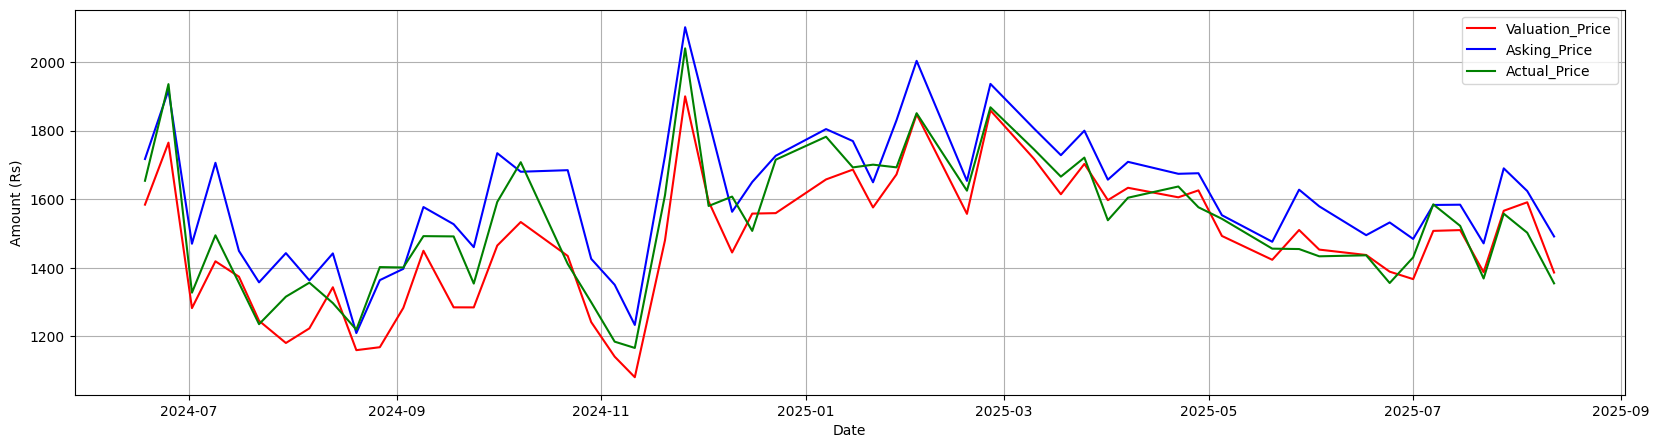

In [29]:
# plotting Valuation_Price , Asking_Price and Actual_Price

plt.figure(figsize=(20,5))
plt.plot(df_avg['Despatch_Date'], df_avg['Valuation_Price'],label = 'Valuation_Price', color = 'red')
plt.plot(df_avg['Despatch_Date'],df_avg['Asking_Price'],label = 'Asking_Price', color = 'blue')
plt.plot(df_avg['Despatch_Date'],df_avg['Actual_Price'],label = 'Actual_Price', color = 'green')
plt.xlabel('Date')
plt.ylabel('Amount (Rs)')
plt.legend(loc='best')
plt.grid()

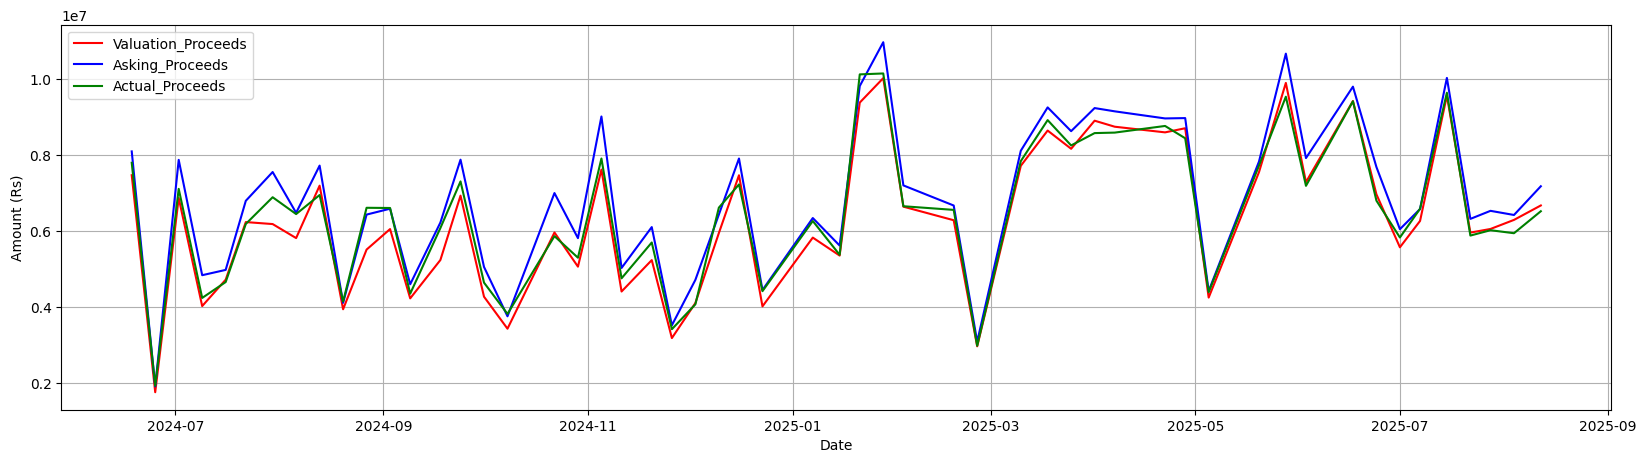

In [30]:
# plotting Valuation_Proceeds , Asking_Proceeds and Actual_Proceeds

plt.figure(figsize=(20,5))
plt.plot(df_avg['Despatch_Date'], df_avg['Valuation_Proceeds'],label = 'Valuation_Proceeds', color = 'red')
plt.plot(df_avg['Despatch_Date'],df_avg['Asking_Proceeds'],label = 'Asking_Proceeds', color = 'blue')
plt.plot(df_avg['Despatch_Date'],df_avg['Actual_Proceeds'],label = 'Actual_Proceeds' , color = 'green')
plt.xlabel('Date')
plt.ylabel('Amount (Rs)')
plt.legend(loc='best')
plt.grid()

#### Time Series Analysis

In [31]:
# seting date column as the index column

df_avg = df_avg.set_index('Despatch_Date')

df_weekly = df_avg.resample(
    rule='W-Tue',        # weekly, anchored to Tuesday
    label='left',        # label interval by its start date
    closed='left',       # include left boundary in interval
    origin='2024-06-18'  # start counting weeks from here
).agg({
    'Valuation_Price': 'mean',
    'Asking_Price': 'mean',
    'Actual_Price': 'mean',
    'Valuation_Quantity': 'sum',
    'Actual_Quantity': 'sum',
    'Valuation_Proceeds': 'sum',
    'Asking_Proceeds': 'sum',
    'Actual_Proceeds': 'sum'
})


In [32]:
# handling missing values

df_weekly = df_weekly.fillna(method = 'ffill')
df_weekly.shape

C:\Users\User\AppData\Local\Temp\ipykernel_23084\584053054.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_weekly = df_weekly.fillna(method = 'ffill')


(61, 8)

In [33]:

df_weekly = df_weekly.mask(df_weekly == 0.0).ffill()
df_weekly.head()

,Valuation_Price,Asking_Price,Actual_Price,Valuation_Quantity,Actual_Quantity,Valuation_Proceeds,Asking_Proceeds,Actual_Proceeds
Despatch_Date,,,,,,,,
2024-06-18,1584.288747,1717.409766,1653.927813,4710.0,4710.0,7462000.0,8089000.0,7790000.0
2024-06-25,1765.151515,1918.181818,1935.858586,990.0,990.0,1747500.0,1899000.0,1916500.0
2024-07-02,1282.523364,1470.280374,1327.551402,5350.0,5350.0,6861500.0,7866000.0,7102400.0
2024-07-09,1419.081272,1706.360424,1494.876325,2830.0,2830.0,4016000.0,4829000.0,4230500.0
2024-07-16,1309.877013,1403.508285,1295.891342,8428.0,8428.0,10938600.0,11756600.0,10827120.0


In [34]:
df_weekly['Actual_Proceeds'].mean()

8305203.278688525

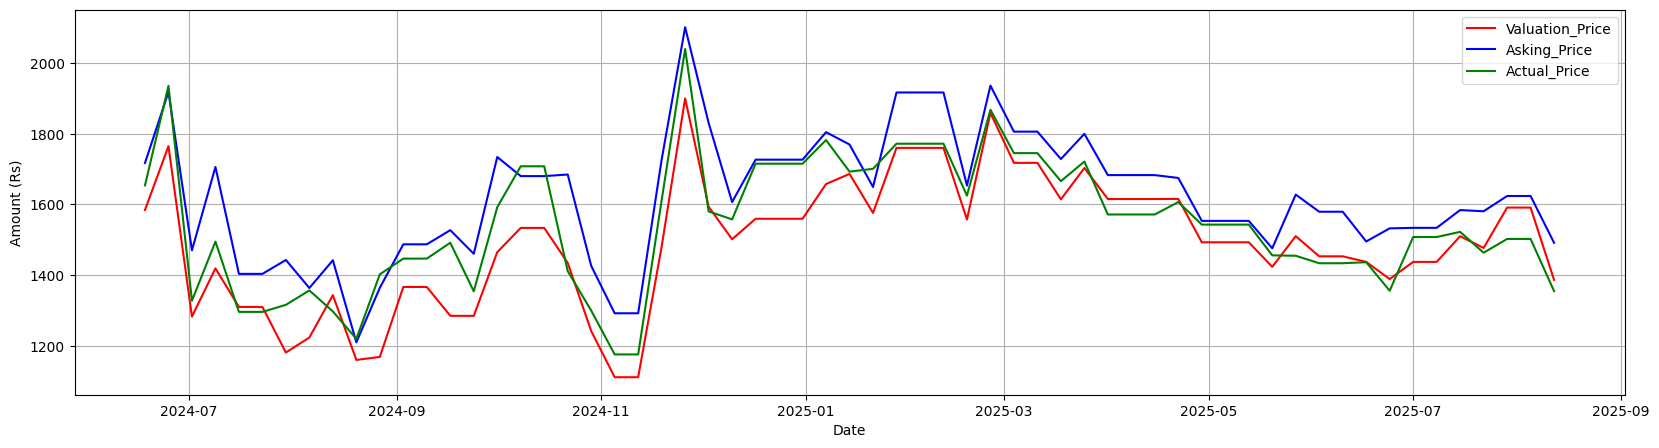

In [35]:
# plotting Valuation_Price , Asking_Price and Actual_Price

plt.figure(figsize=(20,5))
plt.plot(df_weekly['Valuation_Price'],label = 'Valuation_Price', color = 'red')
plt.plot(df_weekly['Asking_Price'],label = 'Asking_Price', color = 'blue')
plt.plot(df_weekly['Actual_Price'],label = 'Actual_Price' , color = 'green')
plt.xlabel('Date')
plt.ylabel('Amount (Rs)')
plt.legend(loc='best')
plt.grid()

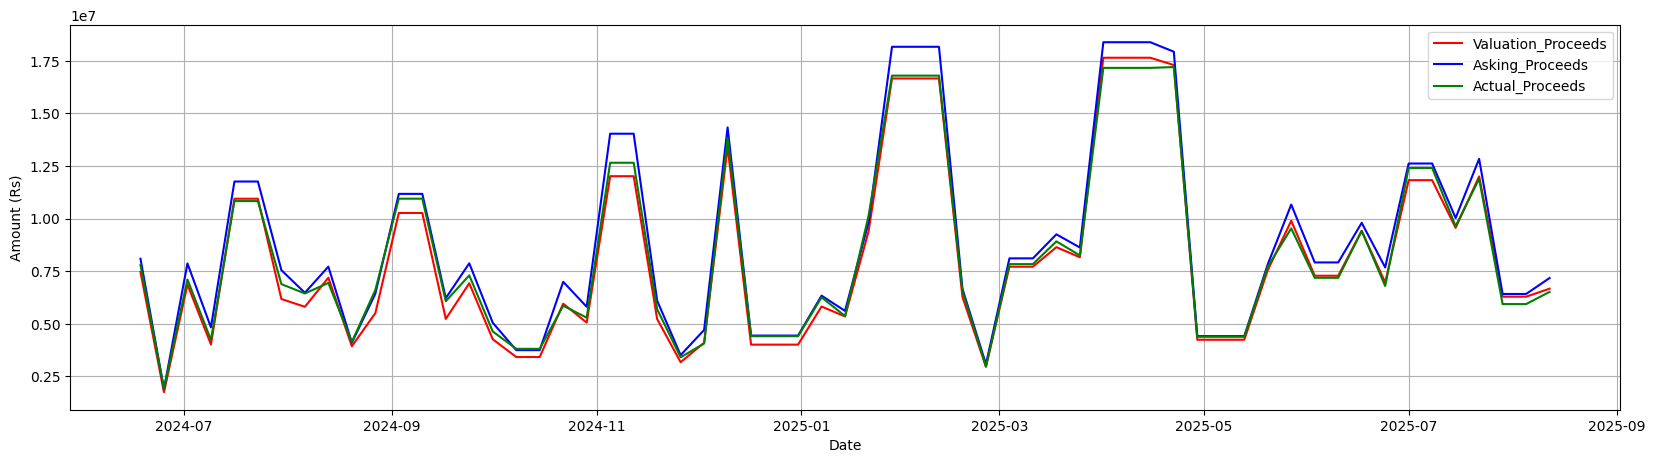

In [36]:
# plotting Valuation_Proceeds , Asking_Proceeds and Actual_Proceeds

plt.figure(figsize=(20,5))
plt.plot(df_weekly['Valuation_Proceeds'],label = 'Valuation_Proceeds', color = 'red')
plt.plot(df_weekly['Asking_Proceeds'],label = 'Asking_Proceeds', color = 'blue')
plt.plot(df_weekly['Actual_Proceeds'],label = 'Actual_Proceeds' , color = 'green')
plt.xlabel('Date')
plt.ylabel('Amount (Rs)')
plt.legend(loc='best')
plt.grid()

##### Stationarity

In [37]:
# function to test stationarity

from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):

    # determining rolling statistics
    rolmean = timeseries.rolling(4).mean()
    rolstd = timeseries.rolling(4).std()

    # plotting rolling statistics
    plt.figure(figsize=(20,5))
    plt.plot(timeseries,label = 'original', color = 'blue')
    plt.plot(rolmean, label = 'Rollin Mean', color ='red')
    plt.plot(rolstd, label =  'Rolling Std', color = 'green')
    plt.xlabel('Date')
    plt.ylabel('Rolling Statistics', size = 15)
    plt.legend()
    plt.grid(True)
    plt.show()

    #dickey fuller test

    print('Results of dickey fuller test:\n')
    adf_test  = adfuller(timeseries, autolag = 'AIC')
    output  = pd.Series(adf_test[0:4], index = ['Test Statistics', 'p-value','No of lags used','No of Observations'])

    for key,value in adf_test[4].items():
        output['critical value(%s)' %key] = value
    print(output)



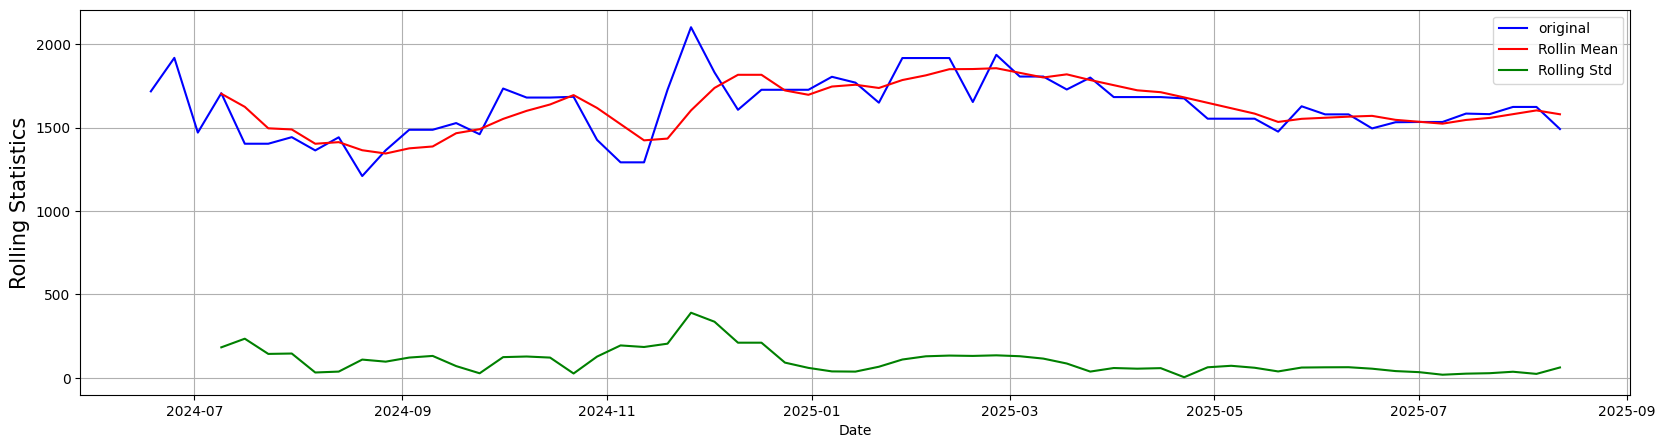

Results of dickey fuller test:

Test Statistics        -3.759672
p-value                 0.003348
No of lags used         0.000000
No of Observations     60.000000
critical value(1%)     -3.544369
critical value(5%)     -2.911073
critical value(10%)    -2.593190
dtype: float64


In [38]:
test_stationarity(df_weekly['Asking_Price'])

p > 0.05 .Therefore, the actual price time series is not stationary.

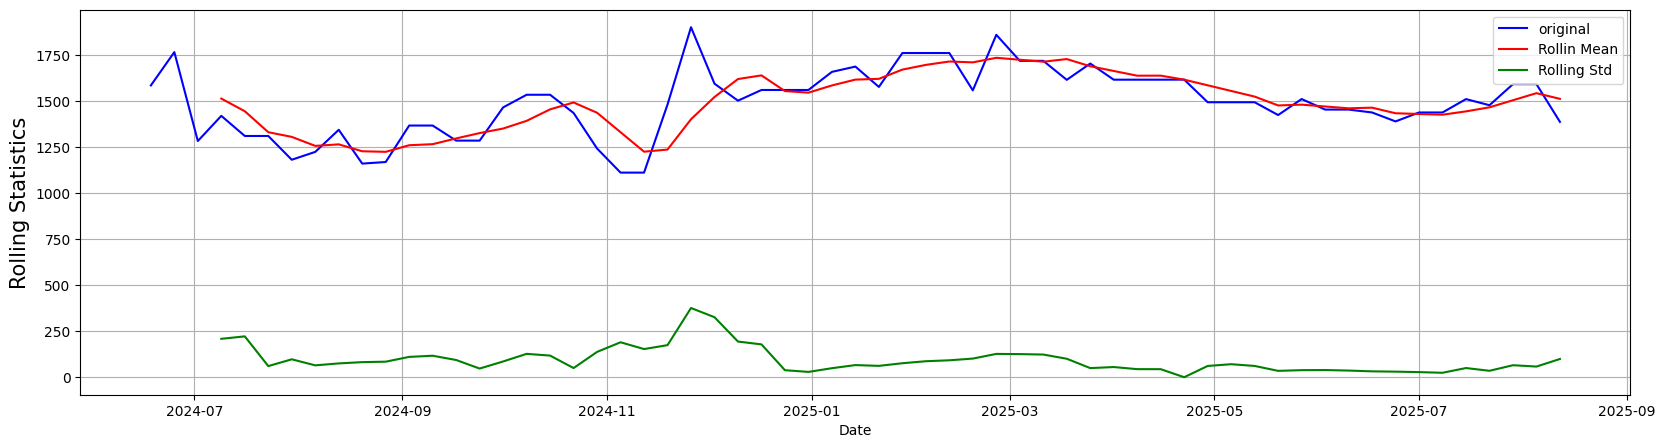

Results of dickey fuller test:

Test Statistics        -3.312435
p-value                 0.014332
No of lags used         0.000000
No of Observations     60.000000
critical value(1%)     -3.544369
critical value(5%)     -2.911073
critical value(10%)    -2.593190
dtype: float64


In [39]:
test_stationarity(df_weekly['Valuation_Price'])

p < 0.05. Therefore, the Valuation_Price time series is stationary.

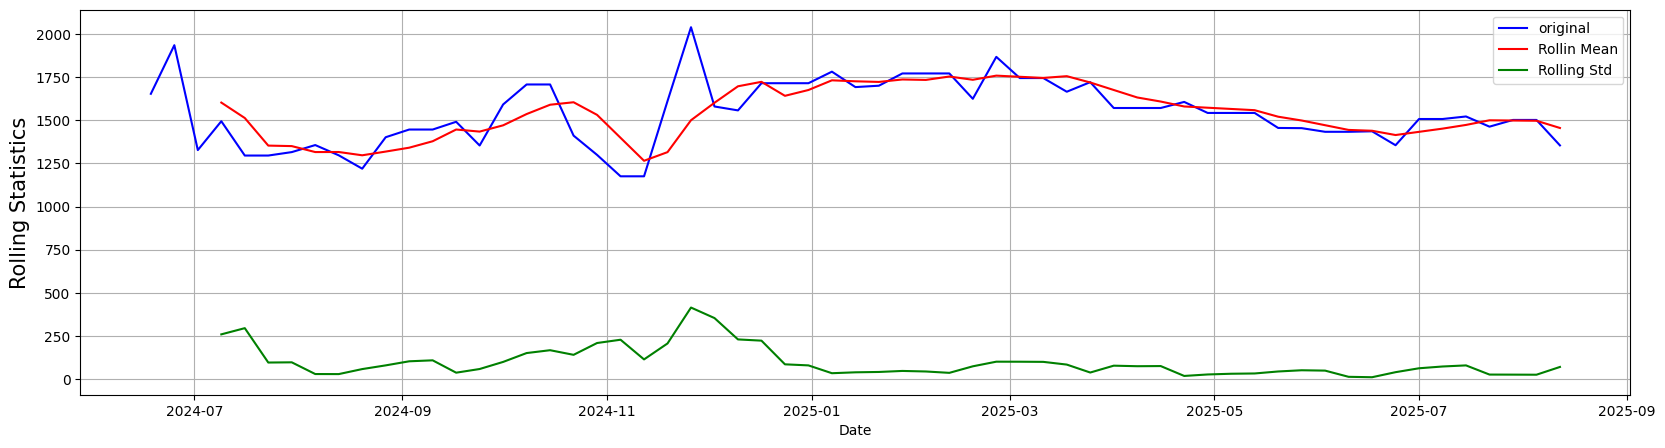

Results of dickey fuller test:

Test Statistics        -3.710027
p-value                 0.003974
No of lags used         0.000000
No of Observations     60.000000
critical value(1%)     -3.544369
critical value(5%)     -2.911073
critical value(10%)    -2.593190
dtype: float64


In [40]:
test_stationarity(df_weekly['Actual_Price'])

p < 0.05. Therefore, the actual price time series is stationary.

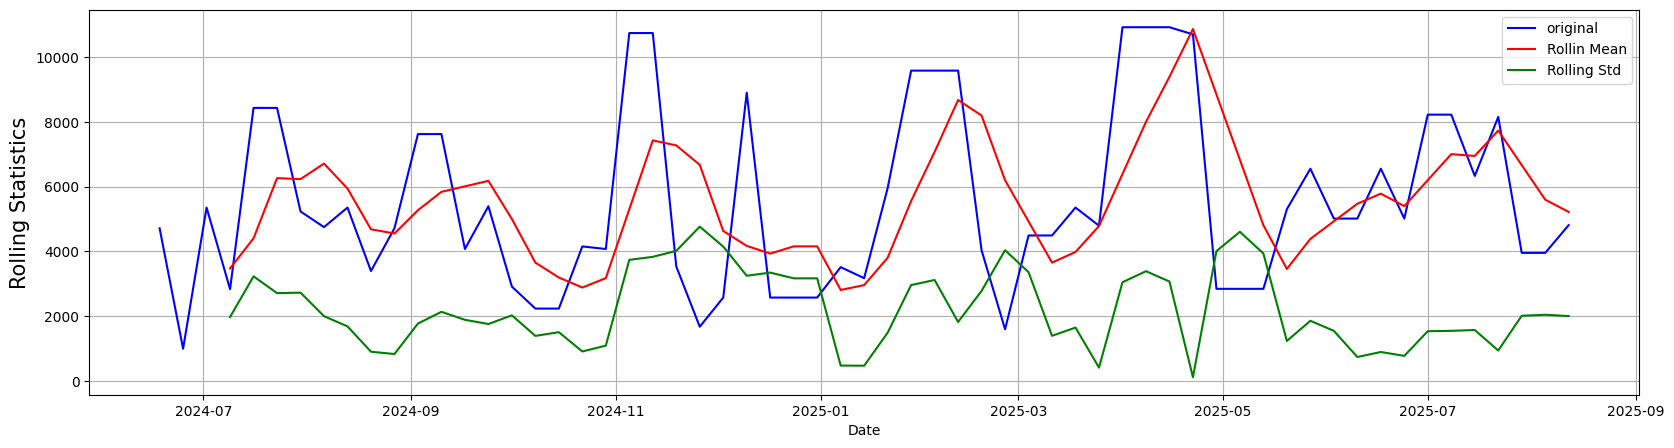

Results of dickey fuller test:

Test Statistics        -5.054005
p-value                 0.000017
No of lags used         1.000000
No of Observations     59.000000
critical value(1%)     -3.546395
critical value(5%)     -2.911939
critical value(10%)    -2.593652
dtype: float64


In [41]:
test_stationarity(df_weekly['Actual_Quantity'])

p < 0.05. Therefore, the actual quantity time series is stationary.

#### Seasonality

<Figure size 640x480 with 0 Axes>

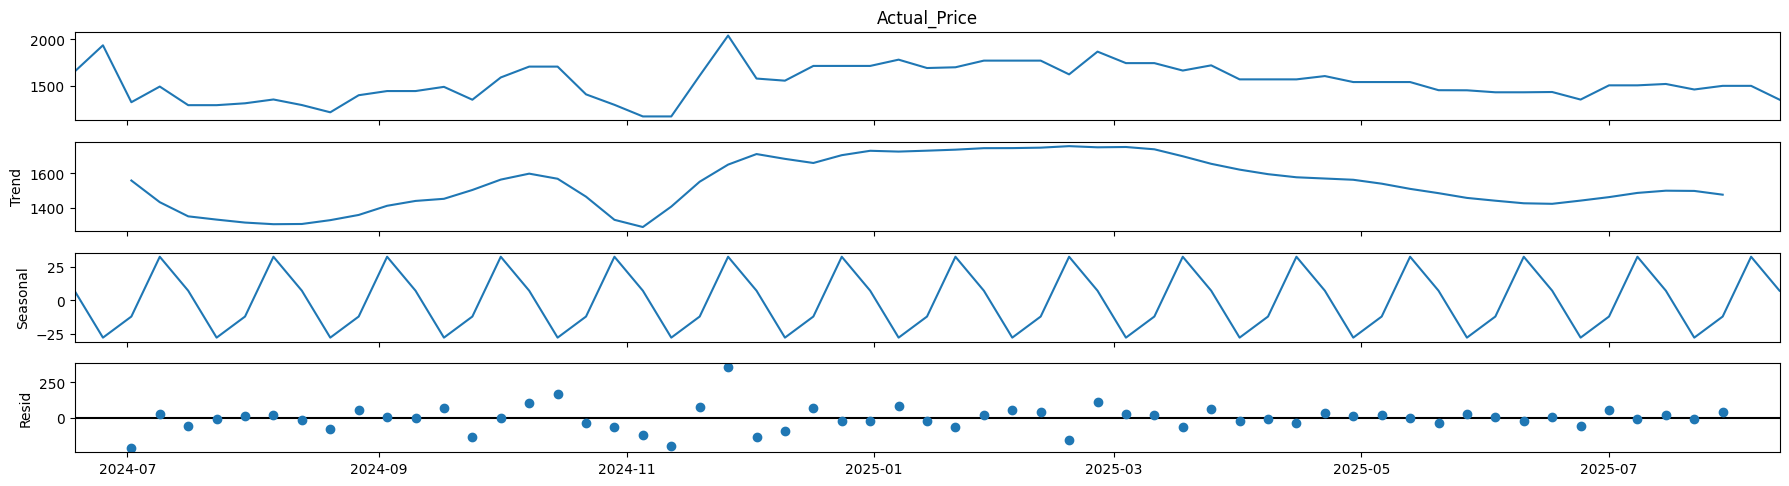

In [42]:
# checking seasonality of prices

from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df_weekly['Actual_Price'], model= 'additive', period= 4)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(20,5)
plt.show()

<Figure size 640x480 with 0 Axes>

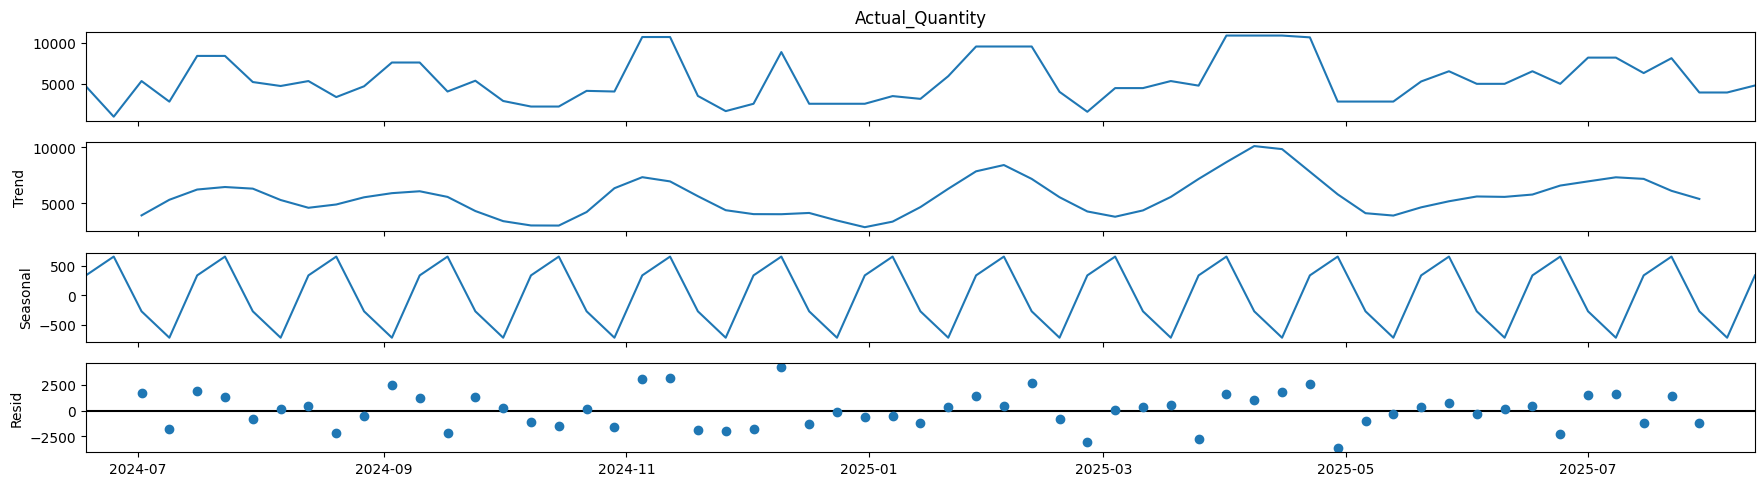

In [43]:
# checking seasonality of quantity

from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df_weekly['Actual_Quantity'], model= 'additive', period= 4)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(20,5)
plt.show()